In [130]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
#US census bureau data: https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html
df_zips = geopandas.read_file('cb_2018_us_zcta510_500k/cb_2018_us_zcta510_500k.shp')
df_zips.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,36083,8600000US36083,36083,659750662,5522919,"MULTIPOLYGON (((-85.63225 32.28098, -85.62439 ..."
1,35441,8600000US35441,35441,172850429,8749105,"MULTIPOLYGON (((-87.83287 32.84437, -87.83184 ..."
2,35051,8600000US35051,35051,280236456,5427285,"POLYGON ((-86.74384 33.25002, -86.73802 33.251..."
3,35121,8600000US35121,35121,372736030,5349303,"POLYGON ((-86.58527 33.94743, -86.58033 33.948..."
4,35058,8600000US35058,35058,178039922,3109259,"MULTIPOLYGON (((-86.87884 34.21196, -86.87649 ..."


In [132]:
#rename zip column
df_zips.rename(columns={'ZCTA5CE10': 'Zip_Code'}, inplace = True)
df_zips = df_zips.astype({'Zip_Code': 'int32'})
df_zips.head()

,Zip_Code,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,36083,8600000US36083,36083,659750662,5522919,"MULTIPOLYGON (((-85.63225 32.28098, -85.62439 ..."
1,35441,8600000US35441,35441,172850429,8749105,"MULTIPOLYGON (((-87.83287 32.84437, -87.83184 ..."
2,35051,8600000US35051,35051,280236456,5427285,"POLYGON ((-86.74384 33.25002, -86.73802 33.251..."
3,35121,8600000US35121,35121,372736030,5349303,"POLYGON ((-86.58527 33.94743, -86.58033 33.948..."
4,35058,8600000US35058,35058,178039922,3109259,"MULTIPOLYGON (((-86.87884 34.21196, -86.87649 ..."


In [91]:
#read state outline file and remove outlying states and territories
df_us = geopandas.read_file('cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
df_us = df_us[~df_us.STUSPS.isin(['AK','HI', 'AA', 'AE','AP','PR','RI','VI'])]
df_us.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [29]:
data =pd.read_csv('party_dataframe.csv')
data.head()

,Geo_Targeting_Included,party,Party_Encoded
0,United States,REP,0.0
1,United States,REP,0.0
2,"NJ-2,New Jersey,United States",REP,0.0
3,"NJ-2,New Jersey,United States",REP,0.0
4,"NJ-2,New Jersey,United States",REP,0.0


In [57]:
#change geo targeting column into list
geo_lists = [item.split(',') for item in data['Geo_Targeting_Included']]
data['Geo_Targeting_Included'] = geo_lists
data.head()

,Geo_Targeting_Included,party,Party_Encoded
0,[United States],REP,0.0
1,[United States],REP,0.0
2,[NJ-2],REP,0.0
3,[New Jersey],REP,0.0
4,[United States],REP,0.0


In [58]:
#create new row for each item in geo targeting column list
data = data.explode('Geo_Targeting_Included').reset_index(drop=True)
data.head()

,Geo_Targeting_Included,party,Party_Encoded
0,United States,REP,0.0
1,United States,REP,0.0
2,NJ-2,REP,0.0
3,New Jersey,REP,0.0
4,United States,REP,0.0


In [59]:
#interate to get zip code values 
numeric_df = pd.DataFrame(columns=['Zip_Code', 'Party_Encoded'])
for index, row in data.iterrows():
    #track progress
    if(index % 50000 == 0):
        print(index)
    if data.iloc[index, 0].isdigit():
        code = int(data.iloc[index, 0])
        party = data.iloc[index, 2]
        dict = {'Zip_Code': code, 'Party_Encoded': party}
        numeric_df = numeric_df.append(dict, ignore_index=True)


0
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000


In [63]:
numeric_df.head()

,Zip_Code,Party_Encoded
0,15047.0,1.0
1,48075.0,1.0
2,32202.0,1.0
3,15047.0,1.0
4,48033.0,1.0


In [83]:
#change columns to type int
numeric_df = numeric_df.astype('int32')

6329

In [84]:
#merge shape file with 
merged = df_zips.merge(numeric_df, on = 'Zip_Code')
merged.head()

,Zip_Code,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,Party_Encoded
0,4354,8600000US04354,04354,105047926,7796255,"POLYGON ((-69.44550 44.46384, -69.39599 44.457...",1
1,4354,8600000US04354,04354,105047926,7796255,"POLYGON ((-69.44550 44.46384, -69.39599 44.457...",1
2,98304,8600000US98304,98304,890510652,10512605,"POLYGON ((-122.17145 46.82080, -122.17142 46.8...",0
3,98304,8600000US98304,98304,890510652,10512605,"POLYGON ((-122.17145 46.82080, -122.17142 46.8...",1
4,98304,8600000US98304,98304,890510652,10512605,"POLYGON ((-122.17145 46.82080, -122.17142 46.8...",1


In [100]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(
    'mycmap', [(0, 'red'), (1, 'blue')])

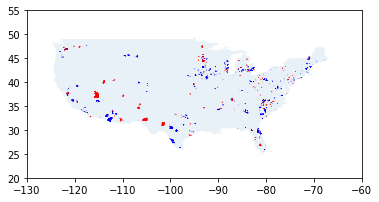

In [129]:
fig, ax = plt.subplots();
df_us.plot(ax=ax, alpha=0.1);
ax.set_xlim([-130, -60]);
ax.set_ylim([20, 55]);
merged.plot(column='Party_Encoded', cmap=cmap, linewidth=10, ax=ax);